In [2]:
import os
import subprocess
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time as t
from numba import jit

import astropy.units as u
import astropy.constants as c
from astroquery import atomic

import photontools
import bokeh


### plt parameters

In [3]:
%matplotlib inline
# %matplotlib notebook

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "stix"
plt.rcParams["font.size"] = 15
plt.rcParams["figure.dpi"] = 72
# plt.rcParams["figure.dpi"] = 150
# plt.rcParams["figure.dpi"] = 300

lss = ['-', '--', '-.', ':']

In [4]:
bands_from_blue = np.array(["UVW2", "UVM2", "UVW1", "U", "B", "V", "R", "I", "J", "H", "K"])
color_from_blue = np.array([plt.cm.jet(i/bands_from_blue.size) for i in range(bands_from_blue.size)])
dict_color = dict(zip(bands_from_blue, color_from_blue))

### run parameters

In [5]:
filepath_he = "../../hewd/gamtmp.d"
filepath_he_high = "../../hewd_hr/gamtmp.d"
filepath_co = "../../cowd/gamtmp.d"
filepath_co_high = "../../cowd100x50x50/gamtmp.d"

directory_ML = "/Users/kawana/GoogleDrive/sync/study/yoshidalab/mypaper/0002_WD_TDE_radiation_transfer/WhiteDwarf_Thermonuclear_Transients/"
filepaths_spectra_ML = subprocess.getoutput('find "{}/WD06_spectra/" | grep ".par" | sort'.format(directory_ML)).split("\n")[1:]

vel_cowd = np.array([2.56466437e+03, 1.18143578e+04, -1.41779372e+00]) * 1e5
vel_hewd = np.array([4.49999438e+03, 1.54867843e+04, 1.27477734e+01]) * 1e5

system = "Vega"
# system = "AB"
# system = "ST"



# pre-defines

In [6]:
filters = photontools.read_all_filters()
filter_focas, filter_johnson, filter_ps, filter_swift, filter_twomass = filters

./photontools/filter_data/focas
./photontools/filter_data/johnson
./photontools/filter_data/panstarrs
./photontools/filter_data/swift
./photontools/filter_data/twomass


In [7]:
%time lc_ML, spectra_ML = photontools.read_MacLeod_data(directory=directory_ML, Force=False)


# binning lc to (theta, phi) = (10, 10)
lc_ML.data[:,:,:,1:] = 10**(-0.4 * lc_ML.data[:,:,:,1:])
lc_ML = lc_ML.binning(N_theta_bins=10, N_phi_bins=10)
lc_ML.data[:,:,:,1:] = -2.5*np.log10(lc_ML.data[:,:,:,1:])

# convert bolomotric luminosity to bolomotric magnitude
lc_ML_bol = lc_ML.bolometric_luminosity_to_magnitude()
lc_ML.data[:,:,:,0] = lc_ML_bol.data


CPU times: user 230 ms, sys: 100 ms, total: 330 ms
Wall time: 378 ms


In [7]:
%time spectra = photontools.read_Maeda_data(filepath_co)

# Doppler shift
%time spectra_shifted = spectra.Doppler_shift_by_intrinsic_velocity(vel_cowd)

# binning 
%time spectra_reduced = spectra_shifted.binning(N_theta_bins=10, N_phi_bins=10, every_wavelength=5)

CPU times: user 5.48 s, sys: 11.1 s, total: 16.6 s
Wall time: 21.7 s
This Doppler shift only changes spectra.data!
Shift spectra.time later by yourself!
CPU times: user 26.3 s, sys: 7.71 s, total: 34 s
Wall time: 39.2 s
CPU times: user 3.64 s, sys: 2.23 s, total: 5.87 s
Wall time: 6.87 s


In [9]:
%time spectra_high = photontools.read_Maeda_data(filepath_co_high)

# Doppler shift
%time spectra_shifted_high = spectra_high.Doppler_shift_by_intrinsic_velocity(vel_cowd)

# binning 
%time spectra_reduced_high = spectra_shifted_high.binning(N_theta_bins=10, N_phi_bins=10, every_wavelength=5)

CPU times: user 5.7 s, sys: 10.4 s, total: 16.1 s
Wall time: 20.4 s
This Doppler shift only changes spectra.data!
Shift spectra.time later by yourself!
CPU times: user 21.3 s, sys: 7.28 s, total: 28.6 s
Wall time: 36.4 s
CPU times: user 3.28 s, sys: 1.59 s, total: 4.87 s
Wall time: 5.65 s


In [10]:
system = "Vega"
# system = "AB"
# system = "ST"


lc_maeda_bol     = spectra_reduced.calc_bolometric_luminosity().bolometric_luminosity_to_magnitude()
lc_maeda_focas   = photontools.calc_band_flux(spectra_reduced, filters[0]).convert_flux_to_magnitude(filters[0], system=system)
lc_maeda_john    = photontools.calc_band_flux(spectra_reduced, filters[1]).convert_flux_to_magnitude(filters[1], system=system)
# lc_maeda_ps      = photontools.calc_band_flux(spectra_reduced, filters[2]).convert_flux_to_magnitude(filters[2], system=system)
lc_maeda_swift   = photontools.calc_band_flux(spectra_reduced, filters[3]).convert_flux_to_magnitude(filters[3], system=system)
lc_maeda_twomass = photontools.calc_band_flux(spectra_reduced, filters[4]).convert_flux_to_magnitude(filters[4], system=system)


/Users/kawana/GoogleDrive/sync/study/yoshidalab/tidal_disruption/imbh-wd/nuclear/std/compare/snaps/successed/photons/analysis/python/photontools/photontools.py:580: RuntimeWarning: divide by zero encountered in log10
  new_lc.data  = -2.5 * np.log10(self.data[:,:,:] / c.L_bol0.cgs.value)
/Users/kawana/GoogleDrive/sync/study/yoshidalab/tidal_disruption/imbh-wd/nuclear/std/compare/snaps/successed/photons/analysis/python/photontools/photontools.py:617: RuntimeWarning: divide by zero encountered in log10
  new_lc.data = -2.5 * np.log10(self.data / flux_zero_lambda / (4 * np.pi * distance.to(u.cm).value **2))
/Users/kawana/GoogleDrive/sync/study/yoshidalab/tidal_disruption/imbh-wd/nuclear/std/compare/snaps/successed/photons/analysis/python/photontools/photontools.py:617: RuntimeWarning: invalid value encountered in log10
  new_lc.data = -2.5 * np.log10(self.data / flux_zero_lambda / (4 * np.pi * distance.to(u.cm).value **2))
/Users/kawana/GoogleDrive/sync/study/yoshidalab/tidal_disruption/i

In [11]:
system = "Vega"
# system = "AB"
# system = "ST"


lc_maeda_high_bol     = spectra_reduced_high.calc_bolometric_luminosity().bolometric_luminosity_to_magnitude()
lc_maeda_high_focas   = photontools.calc_band_flux(spectra_reduced_high, filters[0]).convert_flux_to_magnitude(filters[0], system=system)
lc_maeda_high_john    = photontools.calc_band_flux(spectra_reduced_high, filters[1]).convert_flux_to_magnitude(filters[1], system=system)
# lc_maeda_high_ps      = photontools.calc_band_flux(spectra_reduced_high, filters[2]).convert_flux_to_magnitude(filters[2], system=system)
lc_maeda_high_swift   = photontools.calc_band_flux(spectra_reduced_high, filters[3]).convert_flux_to_magnitude(filters[3], system=system)
lc_maeda_high_twomass = photontools.calc_band_flux(spectra_reduced_high, filters[4]).convert_flux_to_magnitude(filters[4], system=system)


/Users/kawana/GoogleDrive/sync/study/yoshidalab/tidal_disruption/imbh-wd/nuclear/std/compare/snaps/successed/photons/analysis/python/photontools/photontools.py:580: RuntimeWarning: divide by zero encountered in log10
  new_lc.data  = -2.5 * np.log10(self.data[:,:,:] / c.L_bol0.cgs.value)
/Users/kawana/GoogleDrive/sync/study/yoshidalab/tidal_disruption/imbh-wd/nuclear/std/compare/snaps/successed/photons/analysis/python/photontools/photontools.py:617: RuntimeWarning: divide by zero encountered in log10
  new_lc.data = -2.5 * np.log10(self.data / flux_zero_lambda / (4 * np.pi * distance.to(u.cm).value **2))
/Users/kawana/GoogleDrive/sync/study/yoshidalab/tidal_disruption/imbh-wd/nuclear/std/compare/snaps/successed/photons/analysis/python/photontools/photontools.py:617: RuntimeWarning: invalid value encountered in log10
  new_lc.data = -2.5 * np.log10(self.data / flux_zero_lambda / (4 * np.pi * distance.to(u.cm).value **2))
/Users/kawana/GoogleDrive/sync/study/yoshidalab/tidal_disruption/i

# mean lightcurve over theta and phi

Text(0.5, 1.0, 'solid: High resolution, dotted: Low resolution')

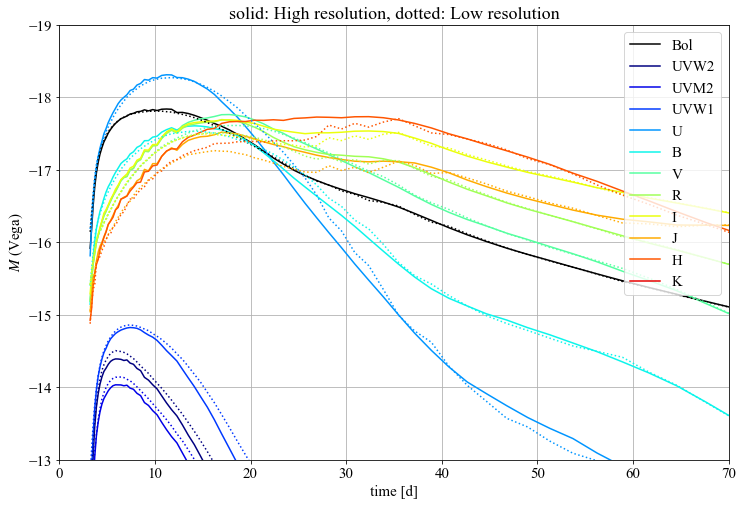

In [12]:

plt.figure(figsize=(12,8))

plt.plot(lc_maeda_high_bol.times, lc_maeda_high_bol.data[:,:,:].mean(axis=(1,2)), label="Bol", color="black")
# swift
list_index_bands = np.argsort(filter_swift.effective_wavelength)
for i in list_index_bands[:3]:
    band = lc_maeda_high_swift.bands[i]
    plt.plot(lc_maeda_high_swift.times, lc_maeda_high_swift.data[:,:,:,i].mean(axis=(1,2)), 
             label=band,
             color=dict_color[band])

#johnson
list_index_bands = np.argsort(filter_johnson.effective_wavelength)
for i in list_index_bands:
    band = lc_maeda_high_john.bands[i][0]
    plt.plot(lc_maeda_high_john.times, lc_maeda_high_john.data[:,:,:,i].mean(axis=(1,2)), 
             label=band,
             color=dict_color[band])

#twomass
list_index_bands = np.argsort(filter_twomass.effective_wavelength)
for i in list_index_bands:
    band = lc_maeda_high_twomass.bands[i][0].capitalize()
    plt.plot(lc_maeda_high_twomass.times, lc_maeda_high_twomass.data[:,:,:,i].mean(axis=(1,2)), 
             label=band,
             color=dict_color[band])

plt.legend()



plt.plot(lc_maeda_bol.times, lc_maeda_bol.data[:,:,:].mean(axis=(1,2)), label="Bol", color="black", linestyle=lss[3])
# swift
list_index_bands = np.argsort(filter_swift.effective_wavelength)
for i in list_index_bands[:3]:
    band = lc_maeda_swift.bands[i]
    plt.plot(lc_maeda_swift.times, lc_maeda_swift.data[:,:,:,i].mean(axis=(1,2)), 
             label=band,
             linestyle=lss[3],
             color=dict_color[band])

#johnson
list_index_bands = np.argsort(filter_johnson.effective_wavelength)
for i in list_index_bands:
    band = lc_maeda_john.bands[i][0]
    plt.plot(lc_maeda_john.times, lc_maeda_john.data[:,:,:,i].mean(axis=(1,2)), 
             label=band,
             linestyle=lss[3],
             color=dict_color[band])

#twomass
list_index_bands = np.argsort(filter_twomass.effective_wavelength)
for i in list_index_bands:
    band = lc_maeda_twomass.bands[i][0].capitalize()
    plt.plot(lc_maeda_twomass.times, lc_maeda_twomass.data[:,:,:,i].mean(axis=(1,2)), 
             label=band,
             linestyle=lss[3],
             color=dict_color[band])

# plt.legend()
# plt.title("Maeda")
# plt.grid()
# plt.gca().invert_yaxis()

# plt.plot(lc_ML_bol.times, lc_ML_bol.data[:,:,:].mean(axis=(1,2)), label="Bol", color="black", linestyle=lss[3])
# for i, band in enumerate(lc_ML.bands):
#     if (i>0):
#         plt.plot(lc_ML.times, lc_ML.data[:,:,:,i].mean(axis=(1,2)), 
#     #                  label=band[1], 
#                  color=dict_color[band[1]],
#                  linestyle=lss[1])    


# plt.title("MacLeod")
plt.xlabel("time [d]")
plt.ylabel(r"$M$ (Vega)")
plt.xlim(0,70)
plt.ylim(-19,-13)
plt.grid()
plt.gca().invert_yaxis()
# plt.title("solid: High resolution, dotted: Low resolution, dashed: MacLeod")
plt.title("solid: High resolution, dotted: Low resolution")
# plt.legend()
# plt.savefig("figs/cowd/lc_compare_resolution.png")


Text(0.5, 1.0, 'solid: High resolution, dotted: Low resolution, dashed: MacLeod')

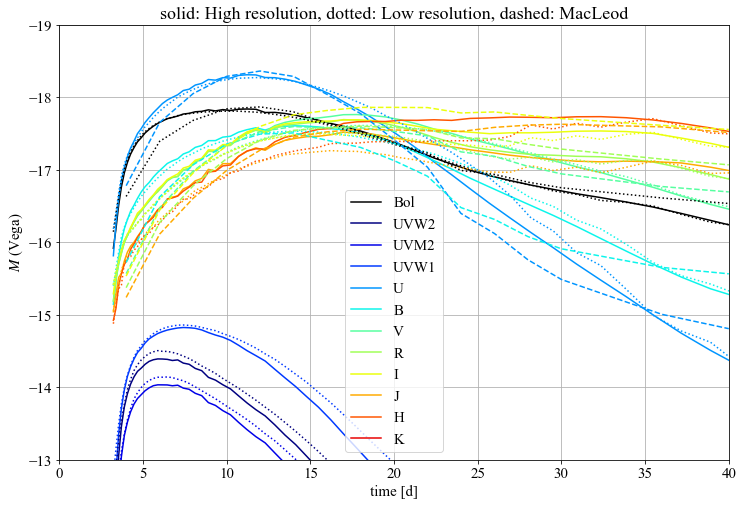

In [13]:

plt.figure(figsize=(12,8))

plt.plot(lc_maeda_high_bol.times, lc_maeda_high_bol.data[:,:,:].mean(axis=(1,2)), label="Bol", color="black")
# swift
list_index_bands = np.argsort(filter_swift.effective_wavelength)
for i in list_index_bands[:3]:
    band = lc_maeda_high_swift.bands[i]
    plt.plot(lc_maeda_high_swift.times, lc_maeda_high_swift.data[:,:,:,i].mean(axis=(1,2)), 
             label=band,
             color=dict_color[band])

#johnson
list_index_bands = np.argsort(filter_johnson.effective_wavelength)
for i in list_index_bands:
    band = lc_maeda_high_john.bands[i][0]
    plt.plot(lc_maeda_high_john.times, lc_maeda_high_john.data[:,:,:,i].mean(axis=(1,2)), 
             label=band,
             color=dict_color[band])

#twomass
list_index_bands = np.argsort(filter_twomass.effective_wavelength)
for i in list_index_bands:
    band = lc_maeda_high_twomass.bands[i][0].capitalize()
    plt.plot(lc_maeda_high_twomass.times, lc_maeda_high_twomass.data[:,:,:,i].mean(axis=(1,2)), 
             label=band,
             color=dict_color[band])

plt.legend()



plt.plot(lc_maeda_bol.times, lc_maeda_bol.data[:,:,:].mean(axis=(1,2)), label="Bol", color="black", linestyle=lss[3])
# swift
list_index_bands = np.argsort(filter_swift.effective_wavelength)
for i in list_index_bands[:3]:
    band = lc_maeda_swift.bands[i]
    plt.plot(lc_maeda_swift.times, lc_maeda_swift.data[:,:,:,i].mean(axis=(1,2)), 
             label=band,
             linestyle=lss[3],
             color=dict_color[band])

#johnson
list_index_bands = np.argsort(filter_johnson.effective_wavelength)
for i in list_index_bands:
    band = lc_maeda_john.bands[i][0]
    plt.plot(lc_maeda_john.times, lc_maeda_john.data[:,:,:,i].mean(axis=(1,2)), 
             label=band,
             linestyle=lss[3],
             color=dict_color[band])

#twomass
list_index_bands = np.argsort(filter_twomass.effective_wavelength)
for i in list_index_bands:
    band = lc_maeda_twomass.bands[i][0].capitalize()
    plt.plot(lc_maeda_twomass.times, lc_maeda_twomass.data[:,:,:,i].mean(axis=(1,2)), 
             label=band,
             linestyle=lss[3],
             color=dict_color[band])

# plt.legend()
# plt.title("Maeda")
# plt.grid()
# plt.gca().invert_yaxis()

plt.plot(lc_ML_bol.times, lc_ML_bol.data[:,:,:].mean(axis=(1,2)), label="Bol", color="black", linestyle=lss[3])
for i, band in enumerate(lc_ML.bands):
    if (i>0):
        plt.plot(lc_ML.times, lc_ML.data[:,:,:,i].mean(axis=(1,2)), 
    #                  label=band[1], 
                 color=dict_color[band[1]],
                 linestyle=lss[1])    


# plt.title("MacLeod")
plt.xlabel("time [d]")
plt.ylabel(r"$M$ (Vega)")
plt.xlim(0,40)
plt.ylim(-19,-13)
plt.grid()
plt.gca().invert_yaxis()
plt.title("solid: High resolution, dotted: Low resolution, dashed: MacLeod")
# plt.title("solid: High resolution, dotted: Low resolution")
# plt.legend()
# plt.savefig("figs/cowd/lc_compare_resolution_all.png")


### spectra at the direction parallel to ejecta velocity

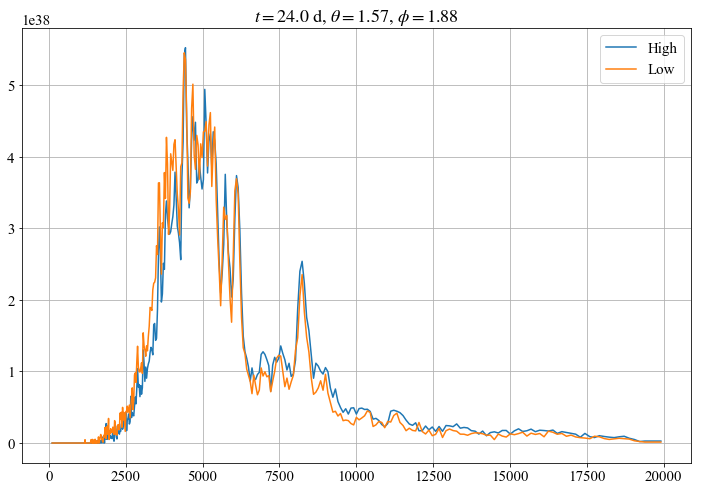

In [21]:
plt.figure(figsize=(12,8))

i_time=42
i_time_ed = 46
j_theta=4
k_phi=2

plt.title(r"$t = {:.1f}$ d, $\theta = {:.2f}$, $\phi = {:.2f}$".format(spectra_reduced.times[i_time:i_time_ed].mean(), spectra_reduced.thetas[j_theta], spectra_reduced.phis[k_phi]))

plt.plot(spectra_reduced_high.wavelengths, spectra_reduced_high.data[i_time:i_time_ed,j_theta,k_phi].mean(axis=0), label="High")
plt.plot(spectra_reduced.wavelengths, spectra_reduced.data[i_time:i_time_ed,j_theta,k_phi].mean(axis=0), label="Low")

# i_time=3
  
# plt.plot(spectra_ML.wavelengths, spectra_ML.data[i_time,j_theta,k_phi], label="MacLeod")

plt.legend()
plt.grid()

### spectra at the direction opposite to ejecta velocity

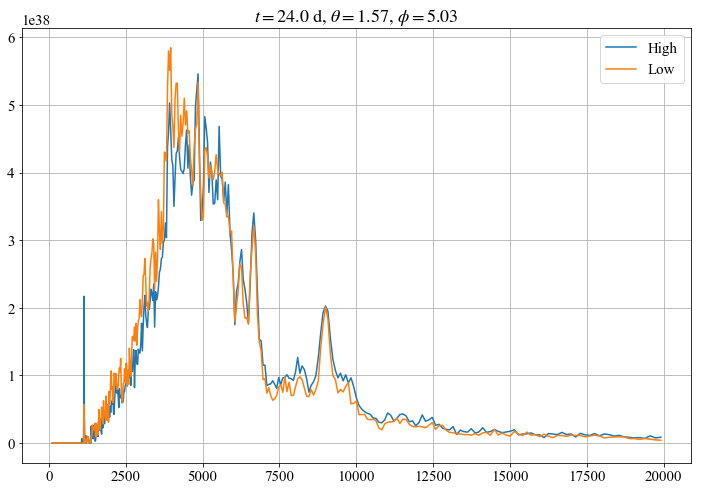

In [24]:
plt.figure(figsize=(12,8))

i_time=42
i_time_ed = 46
j_theta=4
k_phi=7

plt.title(r"$t = {:.1f}$ d, $\theta = {:.2f}$, $\phi = {:.2f}$".format(spectra_reduced.times[i_time:i_time_ed].mean(), spectra_reduced.thetas[j_theta], spectra_reduced.phis[k_phi]))

plt.plot(spectra_reduced_high.wavelengths, spectra_reduced_high.data[i_time:i_time_ed,j_theta,k_phi].mean(axis=0), label="High")
plt.plot(spectra_reduced.wavelengths, spectra_reduced.data[i_time:i_time_ed,j_theta,k_phi].mean(axis=0), label="Low")

# i_time=3
  
# plt.plot(spectra_ML.wavelengths, spectra_ML.data[i_time,j_theta,k_phi], label="MacLeod")

plt.legend()
plt.grid()

# HeWD

In [8]:
%time spectra = photontools.read_Maeda_data(filepath_he)

# Doppler shift
%time spectra_shifted = spectra.Doppler_shift_by_intrinsic_velocity(vel_hewd)

# binning 
%time spectra_reduced = spectra_shifted.binning(N_theta_bins=10, N_phi_bins=10, every_wavelength=5)

CPU times: user 5.85 s, sys: 11 s, total: 16.9 s
Wall time: 23.5 s
This Doppler shift only changes spectra.data!
Shift spectra.time later by yourself!
CPU times: user 29.5 s, sys: 8.43 s, total: 37.9 s
Wall time: 58.2 s
CPU times: user 3.6 s, sys: 2.14 s, total: 5.74 s
Wall time: 6.69 s


In [9]:
%time spectra_high = photontools.read_Maeda_data(filepath_he_high)

# Doppler shift
%time spectra_shifted_high = spectra_high.Doppler_shift_by_intrinsic_velocity(vel_hewd)

# binning 
%time spectra_reduced_high = spectra_shifted_high.binning(N_theta_bins=10, N_phi_bins=10, every_wavelength=5)

CPU times: user 6.44 s, sys: 12.5 s, total: 19 s
Wall time: 22.3 s
This Doppler shift only changes spectra.data!
Shift spectra.time later by yourself!
CPU times: user 36 s, sys: 9.85 s, total: 45.9 s
Wall time: 1min 7s
CPU times: user 5 s, sys: 3.8 s, total: 8.8 s
Wall time: 12.1 s


In [10]:
system = "Vega"
# system = "AB"
# system = "ST"


lc_maeda_bol     = spectra_reduced.calc_bolometric_luminosity().bolometric_luminosity_to_magnitude()
lc_maeda_focas   = photontools.calc_band_flux(spectra_reduced, filters[0]).convert_flux_to_magnitude(filters[0], system=system)
lc_maeda_john    = photontools.calc_band_flux(spectra_reduced, filters[1]).convert_flux_to_magnitude(filters[1], system=system)
# lc_maeda_ps      = photontools.calc_band_flux(spectra_reduced, filters[2]).convert_flux_to_magnitude(filters[2], system=system)
lc_maeda_swift   = photontools.calc_band_flux(spectra_reduced, filters[3]).convert_flux_to_magnitude(filters[3], system=system)
lc_maeda_twomass = photontools.calc_band_flux(spectra_reduced, filters[4]).convert_flux_to_magnitude(filters[4], system=system)


/Users/kawana/GoogleDrive/sync/study/yoshidalab/tidal_disruption/imbh-wd/nuclear/std/compare/snaps/successed/photons/analysis/python/photontools/photontools.py:582: RuntimeWarning: divide by zero encountered in log10
  new_lc.data  = -2.5 * np.log10(self.data[:,:,:] / c.L_bol0.cgs.value)
/Users/kawana/GoogleDrive/sync/study/yoshidalab/tidal_disruption/imbh-wd/nuclear/std/compare/snaps/successed/photons/analysis/python/photontools/photontools.py:619: RuntimeWarning: divide by zero encountered in log10
  new_lc.data = -2.5 * np.log10(self.data / flux_zero_lambda / (4 * np.pi * distance.to(u.cm).value **2))
/Users/kawana/GoogleDrive/sync/study/yoshidalab/tidal_disruption/imbh-wd/nuclear/std/compare/snaps/successed/photons/analysis/python/photontools/photontools.py:619: RuntimeWarning: invalid value encountered in log10
  new_lc.data = -2.5 * np.log10(self.data / flux_zero_lambda / (4 * np.pi * distance.to(u.cm).value **2))
/Users/kawana/GoogleDrive/sync/study/yoshidalab/tidal_disruption/i

In [11]:
system = "Vega"
# system = "AB"
# system = "ST"


lc_maeda_high_bol     = spectra_reduced_high.calc_bolometric_luminosity().bolometric_luminosity_to_magnitude()
lc_maeda_high_focas   = photontools.calc_band_flux(spectra_reduced_high, filters[0]).convert_flux_to_magnitude(filters[0], system=system)
lc_maeda_high_john    = photontools.calc_band_flux(spectra_reduced_high, filters[1]).convert_flux_to_magnitude(filters[1], system=system)
# lc_maeda_high_ps      = photontools.calc_band_flux(spectra_reduced_high, filters[2]).convert_flux_to_magnitude(filters[2], system=system)
lc_maeda_high_swift   = photontools.calc_band_flux(spectra_reduced_high, filters[3]).convert_flux_to_magnitude(filters[3], system=system)
lc_maeda_high_twomass = photontools.calc_band_flux(spectra_reduced_high, filters[4]).convert_flux_to_magnitude(filters[4], system=system)


/Users/kawana/GoogleDrive/sync/study/yoshidalab/tidal_disruption/imbh-wd/nuclear/std/compare/snaps/successed/photons/analysis/python/photontools/photontools.py:582: RuntimeWarning: divide by zero encountered in log10
  new_lc.data  = -2.5 * np.log10(self.data[:,:,:] / c.L_bol0.cgs.value)
/Users/kawana/GoogleDrive/sync/study/yoshidalab/tidal_disruption/imbh-wd/nuclear/std/compare/snaps/successed/photons/analysis/python/photontools/photontools.py:619: RuntimeWarning: divide by zero encountered in log10
  new_lc.data = -2.5 * np.log10(self.data / flux_zero_lambda / (4 * np.pi * distance.to(u.cm).value **2))
/Users/kawana/GoogleDrive/sync/study/yoshidalab/tidal_disruption/imbh-wd/nuclear/std/compare/snaps/successed/photons/analysis/python/photontools/photontools.py:619: RuntimeWarning: invalid value encountered in log10
  new_lc.data = -2.5 * np.log10(self.data / flux_zero_lambda / (4 * np.pi * distance.to(u.cm).value **2))
/Users/kawana/GoogleDrive/sync/study/yoshidalab/tidal_disruption/i

# mean lightcurve over theta and phi

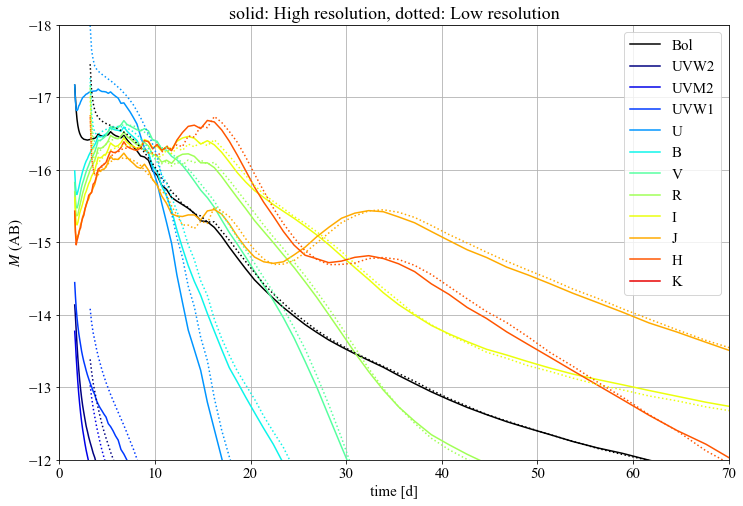

In [22]:

plt.figure(figsize=(12,8))

plt.plot(lc_maeda_high_bol.times, lc_maeda_high_bol.data[:,:,:].mean(axis=(1,2)), label="Bol", color="black")
# swift
list_index_bands = np.argsort(filter_swift.effective_wavelength)
for i in list_index_bands[:3]:
    band = lc_maeda_high_swift.bands[i]
    plt.plot(lc_maeda_high_swift.times, lc_maeda_high_swift.data[:,:,:,i].mean(axis=(1,2)), 
             label=band,
             color=dict_color[band])

#johnson
list_index_bands = np.argsort(filter_johnson.effective_wavelength)
for i in list_index_bands:
    band = lc_maeda_high_john.bands[i][0]
    plt.plot(lc_maeda_high_john.times, lc_maeda_high_john.data[:,:,:,i].mean(axis=(1,2)), 
             label=band,
             color=dict_color[band])

#twomass
list_index_bands = np.argsort(filter_twomass.effective_wavelength)
for i in list_index_bands:
    band = lc_maeda_high_twomass.bands[i][0].capitalize()
    plt.plot(lc_maeda_high_twomass.times, lc_maeda_high_twomass.data[:,:,:,i].mean(axis=(1,2)), 
             label=band,
             color=dict_color[band])

plt.legend()



plt.plot(lc_maeda_bol.times, lc_maeda_bol.data[:,:,:].mean(axis=(1,2)), label="Bol", color="black", linestyle=lss[3])
# swift
list_index_bands = np.argsort(filter_swift.effective_wavelength)
for i in list_index_bands[:3]:
    band = lc_maeda_swift.bands[i]
    plt.plot(lc_maeda_swift.times, lc_maeda_swift.data[:,:,:,i].mean(axis=(1,2)), 
             label=band,
             linestyle=lss[3],
             color=dict_color[band])

#johnson
list_index_bands = np.argsort(filter_johnson.effective_wavelength)
for i in list_index_bands:
    band = lc_maeda_john.bands[i][0]
    plt.plot(lc_maeda_john.times, lc_maeda_john.data[:,:,:,i].mean(axis=(1,2)), 
             label=band,
             linestyle=lss[3],
             color=dict_color[band])

#twomass
list_index_bands = np.argsort(filter_twomass.effective_wavelength)
for i in list_index_bands:
    band = lc_maeda_twomass.bands[i][0].capitalize()
    plt.plot(lc_maeda_twomass.times, lc_maeda_twomass.data[:,:,:,i].mean(axis=(1,2)), 
             label=band,
             linestyle=lss[3],
             color=dict_color[band])

# plt.legend()
# plt.title("Maeda")
# plt.grid()
# plt.gca().invert_yaxis()

# plt.plot(lc_ML_bol.times, lc_ML_bol.data[:,:,:].mean(axis=(1,2)), label="Bol", color="black", linestyle=lss[3])
# for i, band in enumerate(lc_ML.bands):
#     if (i>0):
#         plt.plot(lc_ML.times, lc_ML.data[:,:,:,i].mean(axis=(1,2)), 
#     #                  label=band[1], 
#                  color=dict_color[band[1]],
#                  linestyle=lss[1])    


# plt.title("MacLeod")
plt.xlabel("time [d]")
plt.ylabel(r"$M$ (AB)")
# plt.ylabel(r"$M$ (Vega)")
plt.xlim(0,70)
plt.ylim(-18,-12)
plt.grid()
plt.gca().invert_yaxis()
# plt.title("solid: High resolution, dotted: Low resolution, dashed: MacLeod")
plt.title("solid: High resolution, dotted: Low resolution")
# plt.legend()
# plt.savefig("figs/hewd/lc_compare_resolution.png")
# plt.show()


### spectra at the direction parallel to ejecta velocity

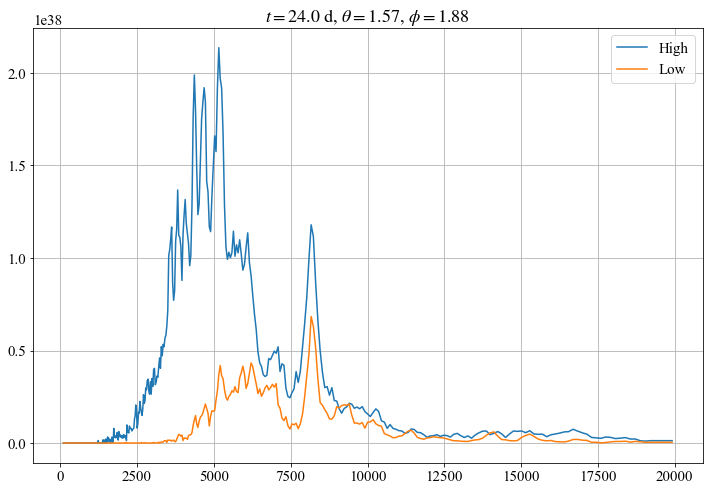

In [15]:
plt.figure(figsize=(12,8))

i_time=42
i_time_ed = 46
j_theta=4
k_phi=2

plt.title(r"$t = {:.1f}$ d, $\theta = {:.2f}$, $\phi = {:.2f}$".format(spectra_reduced.times[i_time:i_time_ed].mean(), spectra_reduced.thetas[j_theta], spectra_reduced.phis[k_phi]))

plt.plot(spectra_reduced_high.wavelengths, spectra_reduced_high.data[i_time:i_time_ed,j_theta,k_phi].mean(axis=0), label="High")
plt.plot(spectra_reduced.wavelengths, spectra_reduced.data[i_time:i_time_ed,j_theta,k_phi].mean(axis=0), label="Low")

# i_time=3
  
# plt.plot(spectra_ML.wavelengths, spectra_ML.data[i_time,j_theta,k_phi], label="MacLeod")

plt.legend()
plt.grid()

### spectra at the direction opposite to ejecta velocity

In [ ]:
lines_name = np.array(["Ca II", "O I", "Si II"])
lines_lambda = np.array([7291, 6300, ])

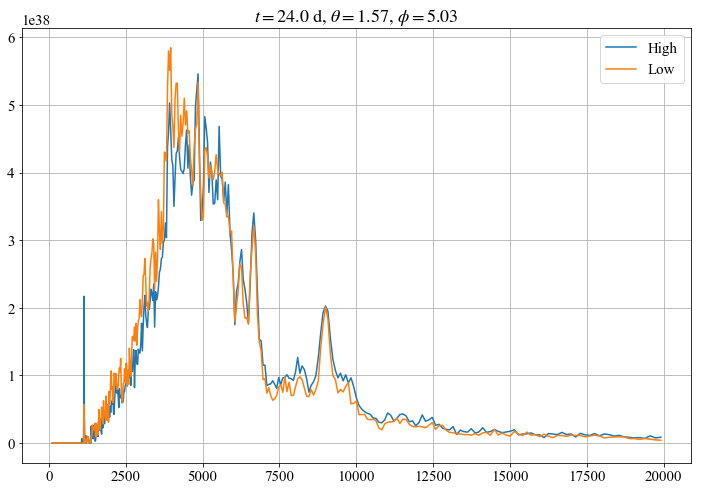

In [24]:
plt.figure(figsize=(12,8))

i_time=42
i_time_ed = 46
j_theta=4
k_phi=7

plt.title(r"$t = {:.1f}$ d, $\theta = {:.2f}$, $\phi = {:.2f}$".format(spectra_reduced.times[i_time:i_time_ed].mean(), spectra_reduced.thetas[j_theta], spectra_reduced.phis[k_phi]))

plt.plot(spectra_reduced_high.wavelengths, spectra_reduced_high.data[i_time:i_time_ed,j_theta,k_phi].mean(axis=0), label="High")
plt.plot(spectra_reduced.wavelengths, spectra_reduced.data[i_time:i_time_ed,j_theta,k_phi].mean(axis=0), label="Low")

# i_time=3
  
# plt.plot(spectra_ML.wavelengths, spectra_ML.data[i_time,j_theta,k_phi], label="MacLeod")

plt.legend()
plt.grid()

# Things related to bolometric luminosity

## viewing angle dependence

In [85]:
# %time spectra_high = photontools.read_Maeda_data(filepath_co_high)

# # Doppler shift
# %time spectra_shifted_high = spectra_high.Doppler_shift_by_intrinsic_velocity(vel_cowd)

# binning 
%time spectra_reduced_high = spectra_shifted_high.binning(N_theta_bins=10, N_phi_bins=10, every_wavelength=5)
# %time spectra_reduced_high = spectra_shifted_high.binning(N_theta_bins=20, N_phi_bins=20, every_wavelength=1)

lc_maeda_high_bol = spectra_reduced_high.calc_bolometric_luminosity()


CPU times: user 5.56 s, sys: 6.25 s, total: 11.8 s
Wall time: 22 s


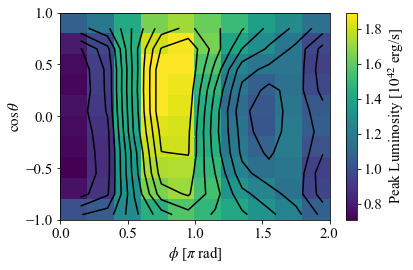

In [89]:
lc_ = lc_maeda_high_bol[9:,:10]

fig = plt.figure()
plt.pcolormesh((np.append(0, lc_.phis) / np.pi ), np.append(1., np.cos(lc_.thetas)), lc_.data.max(axis=0) / 1e42, )
cb_ = plt.colorbar()
cb_.set_label(r"Peak Luminosity [$10^{42}$ erg/s]")

contour_ = plt.contour(lc_.phis / np.pi - 0.05, np.cos(lc_.thetas) + 0.05, lc_.data.max(axis=0) / 1e42, levels=np.arange(0.7, 2.1, 0.1), colors=["black"])
# contour_.clabel(fmt="%1.1f")

plt.xlabel(r"$\phi$ [$\pi$ rad]")
plt.ylabel(r"$\cos\,\theta$")
fig.tight_layout()
# plt.savefig("figs/hewd/Lpeak_angle_contour.pdf", dpi=300)
plt.show()
plt.close()


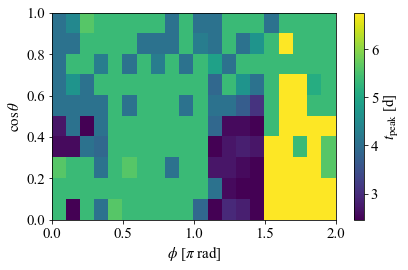

In [64]:
lc_ = lc_maeda_high_bol[9:,:10]

fig = plt.figure()
plt.pcolormesh((np.append(0, lc_.phis) / np.pi ), np.append(1., np.cos(lc_.thetas)), lc_.times[lc_.data.argmax(axis=0)], )
cb_ = plt.colorbar()
cb_.set_label(r"$t_{\rm peak}$ [d]")
plt.xlabel(r"$\phi$ [$\pi$ rad]")
plt.ylabel(r"$\cos\,\theta$")
fig.tight_layout()
plt.savefig("figs/hewd/tpeak_angle.pdf", dpi=300)



# comparison with fallback rate

In [38]:
from matplotlib.lines import Line2D

In [39]:
Mbh = 10 ** 2.5 * u.Msun

sph_path = "/Users/kawana/GoogleDrive/sync/study/yoshidalab/tidal_disruption/imbh-wd/nuclear/std/compare/snaps/successed/snap_bh3.16e+02_wd0.20_beta05.0_00786432_he_irirt05_pot2_nuc1/sph_t0240_pandas.pickle"
# sph_path = "/Users/kawana/GoogleDrive/sync/study/yoshidalab/tidal_disruption/imbh-wd/nuclear/std/compare/snaps/successed/snap_bh3.16e+02_wd0.20_beta05.0_00786432_he_irirt05_pot2_nuc1/sph_calc_t9999.pickle"
data_sph = pd.read_pickle(sph_path)

lc_maeda_high_bol = spectra_reduced_high.calc_bolometric_luminosity()


In [47]:
def give_center_of_bin(bin_with_edge, logscale=True):
    bin_with_edge = bin_with_edge.cgs.value
    if(logscale):
        bin_linear = np.log10(bin_with_edge)
    else:
        bin_linear = bin_with_edge
    bin_center = 0.5 * (bin_linear[1:] + bin_linear[:-1])
    if(logscale):
        bin_center = 10 ** bin_center
    return bin_center

def Eddington_lum(Mbh, eta=0.1, kappa=None, Ye=0.5):
    """return (Eddington luminosity, Eddinton accretion rate)"""
    if kappa is None:
        Ledd = 4 * np.pi * c.G * Mbh * c.m_p * c.c / c.sigma_T / Ye
    else:
        Ledd = 4 * np.pi * c.G * Mbh * c.c / kappa        
    MdotEdd = Ledd * c.c ** (-2) / eta
    return Ledd.cgs.value, MdotEdd.cgs.value

def calc_accretion_rate(data:pd.DataFrame, Mbh, time_bin, col_mass=None, col_epsilon=None):
    """
    Mbh and time_bin must be given with units
    time_bin: include the both edges
    """
    def _period_(Mbh, epsilon):
        aaa = 0.5 * c.G * Mbh / (- epsilon * c.c * c.c)
        ret_ =  2 * np.pi * (aaa ** 3 / (c.G * Mbh)) ** (0.5)
        return ret_
    
    if (col_mass is None):
        col_mass = "c3"
    if (col_epsilon is None):
        col_epsilon = "c50"

    data_bound = data[data[col_epsilon] < 0]
    mass_arr    = np.array(data_bound[col_mass])
    epsilon_arr = np.array(data_bound[col_epsilon])
    period_arr  = _period_(Mbh, epsilon_arr)
#     display(_period_(Mbh, epsilon_arr))
#     print(epsilon_arr.min(), _period_(Mbh, epsilon_arr.min()).cgs.value)
#     display(period_arr)
#     display(period_arr.cgs)
#     print(period_arr.cgs.value.min())
    mass_in_each_time_bin = np.histogram(period_arr.cgs.value, bins=time_bin.cgs.value, weights=np.array(mass_arr))[0]
    ret_ = mass_in_each_time_bin / np.diff(time_bin.cgs.value)
    return ret_ * u.g / u.s


In [55]:
time_bin = np.logspace(-4, 2, 100) * u.d
time_bin_center = give_center_of_bin(time_bin, logscale=True)
mdot_ = calc_accretion_rate(data_sph, Mbh, time_bin)

Ledd_ = Eddington_lum(Mbh, Ye=0.1)[0]
Ledd = Eddington_lum(Mbh, kappa=0.2 * u.g /u.cm/u.cm)[0]
print(Ledd_, Ledd)

3.975189084289744e+41 7.90518804708855e+40


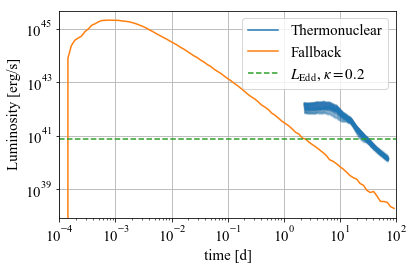

In [57]:
xmin_, xmax_ = time_bin.to(u.d).value.min(), time_bin.to(u.d).value.max()

fig = plt.figure()
ax = plt.gca()

first = True
lc_ = lc_maeda_high_bol[9:-2]
for i in range(lc_.thetas.size):
    for j in range(lc_.phis.size):
            ax.loglog(lc_.times * spectra_shifted_high.Doppler_shift_intrinsic[i,j], lc_.data[:,i,j], alpha=0.03, color="C0", label="")


ax.loglog((time_bin_center * u.s).to(u.d) , 0.1 * mdot_ * c.c**2, color="C1", label="Fallback")

ax.plot([xmin_, xmax_], [Ledd, Ledd], color="C2", label=r"$L_{\rm {Edd}}$, $\kappa=0.2$", ls=lss[1])

plt.xlabel("time [d]")
plt.ylabel("Luminosity [erg/s]")
plt.xlim(xmin_, xmax_)

handles, labels = ax.get_legend_handles_labels()
handles0 = [Line2D([1e10], [1e10], label="Thermonuclear", color="C0")]
labels0 = ["Thermonuclear"]
handles0.extend(handles)
labels0.extend(labels)
handles = handles0
labels = labels0
ax.legend(handles, labels, loc="best")

plt.grid()

fig.tight_layout()
plt.savefig("figs/hewd/compare_fallback.pdf", dpi=300)
plt.show()
plt.close()
